In [55]:
""" Q1: 
Load and read the 'imbd.xlsx' file. Read the 'imbd' sheet into a DataFrame named df.

- What are the dimensions of the DataFrame?
- What are the column titles and the types of data in each?
- Examine the first 10 rows of data.
"""

import pandas as pd

xls = pd.ExcelFile('imdb.xlsx')
df = xls.parse('imdb')
df.shape

(178, 8)

In [56]:
df.dtypes

movie_title        object
director_id         int64
country_id          int64
content_rating     object
title_year          int64
imdb_score        float64
gross               int64
duration            int64
dtype: object

In [57]:
df.head(10)

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142
1,The GodfatherÊ,33,1,R,1972,9.2,134821952,175
2,The Dark KnightÊ,16,1,PG-13,2008,9.0,533316061,152
3,The Godfather: Part IIÊ,33,1,R,1974,9.0,57300000,220
4,The Lord of the Rings: The Return of the KingÊ,83,1,PG-13,2003,8.9,377019252,192
5,Pulp FictionÊ,85,1,R,1994,8.9,107930000,178
6,"The Good, the Bad and the UglyÊ",98,2,Approved,1966,8.9,6100000,142
7,Schindler's ListÊ,103,1,R,1993,8.9,96067179,185
8,InceptionÊ,16,1,PG-13,2010,8.8,292568851,148
9,Fight ClubÊ,22,1,R,1999,8.8,37023395,151


In [59]:
"""Q2:
Import the "directors" and "countries" sheets into their own DataFrames.

Check the "Directors" sheet for duplicates based on the "id" column using:
df_directors["id"].value_counts()

Remove duplicates using the following:
df_directors = df_directors.drop_duplicates()
"""

df_directors = xls.parse('directors')
df_directors["id"].value_counts()

16     7
71     6
85     6
103    5
90     4
83     3
46     3
33     3
82     3
22     3
88     3
17     3
95     3
98     3
48     3
76     2
40     2
73     2
26     2
3      2
34     2
24     2
79     2
23     2
81     2
5      2
60     2
113    2
107    2
91     2
      ..
110    1
111    1
112    1
114    1
115    1
80     1
78     1
77     1
62     1
52     1
53     1
54     1
55     1
56     1
57     1
58     1
116    1
61     1
63     1
75     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
72     1
74     1
1      1
Name: id, dtype: int64

In [60]:
df_directors = df_directors.drop_duplicates()
df_directors.shape

(117, 2)

In [61]:
df_directors["id"].value_counts()

117    1
43     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
44     1
58     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     1
56     1
30     1
29     1
      ..
89     1
88     1
87     1
86     1
61     1
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     1
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     1
1      1
Name: id, dtype: int64

In [62]:
df_countries = xls.parse('countries')
df_countries.shape

(19, 2)

In [ ]:
""" Q3: 
Join the data with an inner join.
Do this by merging into df.
"""

In [63]:
df = pd.merge(left=df, right=df_countries, 
              how='inner', left_on='country_id', 
              right_on='id')

In [64]:
df = pd.merge(left=df, right=df_directors, 
              how='inner', left_on='director_id', 
              right_on='id')

In [66]:
df.shape

(178, 12)

In [67]:
df.head()

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
0,The Shawshank RedemptionÊ,34,1,R,1994,9.3,28341469,142,1,USA,34,Frank Darabont
1,The Green MileÊ,34,1,R,1999,8.5,136801374,189,1,USA,34,Frank Darabont
2,The GodfatherÊ,33,1,R,1972,9.2,134821952,175,1,USA,33,Francis Ford Coppola
3,The Godfather: Part IIÊ,33,1,R,1974,9.0,57300000,220,1,USA,33,Francis Ford Coppola
4,Apocalypse NowÊ,33,1,R,1979,8.5,78800000,289,1,USA,33,Francis Ford Coppola


In [68]:
""" Q4: 
Print the first ten rows of movie titles. 
There's an extra character. 
Remove it from the data using str.replace.
"""

print(df["movie_title"][:10])

0    The Shawshank RedemptionÊ
1              The Green MileÊ
2               The GodfatherÊ
3      The Godfather: Part IIÊ
4              Apocalypse NowÊ
5             The Dark KnightÊ
6                   InceptionÊ
7                InterstellarÊ
8                     MementoÊ
9                The PrestigeÊ
Name: movie_title, dtype: object


In [69]:
df["movie_title"] = df["movie_title"].str.replace('Ê','')
print(df["movie_title"][:10])

0    The Shawshank Redemption
1              The Green Mile
2               The Godfather
3      The Godfather: Part II
4              Apocalypse Now
5             The Dark Knight
6                   Inception
7                Interstellar
8                     Memento
9                The Prestige
Name: movie_title, dtype: object


In [70]:
""" Q5: 
Get the summary statistics for imdb_score and gross.
"""

score_gross = ["imdb_score", "gross"]
df[score_gross].describe()

,imdb_score,gross
count,178.000000,1.780000e+02
mean,8.294382,1.030402e+08
std,0.266960,1.242549e+08
min,8.000000,8.060000e+03
25%,8.100000,1.318510e+07
50%,8.200000,5.194371e+07
75%,8.475000,1.522436e+08
max,9.300000,6.232795e+08


In [71]:
"""Q6: 
Is how much a movie makes indicative of how good it is?
Make a simple scatter plot comparing gross to imdb_score for movies released in or after 2000.
It may be useful to scale the axis demarking gross.
What is your verdict?
"""

#get movies released in or after 2000
df_2000 = df[df['title_year'] >= 2000]
df_2000

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
5,The Dark Knight,16,1,PG-13,2008,9.0,533316061,152,1,USA,16,Christopher Nolan
6,Inception,16,1,PG-13,2010,8.8,292568851,148,1,USA,16,Christopher Nolan
7,Interstellar,16,1,PG-13,2014,8.6,187991439,169,1,USA,16,Christopher Nolan
8,Memento,16,1,R,2000,8.5,25530884,113,1,USA,16,Christopher Nolan
9,The Prestige,16,1,PG-13,2006,8.5,53082743,130,1,USA,16,Christopher Nolan
10,The Dark Knight Rises,16,1,PG-13,2012,8.5,448130642,164,1,USA,16,Christopher Nolan
11,Batman Begins,16,1,PG-13,2005,8.3,205343774,128,1,USA,16,Christopher Nolan
12,The Lord of the Rings: The Return of the King,83,1,PG-13,2003,8.9,377019252,192,1,USA,83,Peter Jackson
13,The Lord of the Rings: The Two Towers,83,1,PG-13,2002,8.7,340478898,172,1,USA,83,Peter Jackson
14,The Lord of the Rings: The Fellowship of the Ring,83,3,PG-13,2001,8.8,313837577,171,3,New Zealand,83,Peter Jackson


In [72]:
#create series with movie imdb score
x1 = df_2000['imdb_score']
x1

5      9.0
6      8.8
7      8.6
8      8.5
9      8.5
10     8.5
11     8.3
12     8.9
13     8.7
14     8.8
16     8.5
18     8.3
19     8.1
20     8.0
28     8.1
35     8.5
38     8.2
39     8.1
47     8.5
51     8.5
53     8.1
56     8.4
57     8.2
58     8.4
64     8.3
66     8.2
67     8.1
73     8.3
74     8.3
75     8.3
      ... 
128    8.0
134    8.6
136    8.2
138    8.7
139    8.1
140    8.5
142    8.3
143    8.0
146    8.3
152    8.1
155    8.1
156    8.0
157    8.0
158    8.5
159    8.4
161    8.0
162    8.0
163    8.0
164    8.0
165    8.4
166    8.4
167    8.4
168    8.0
170    8.3
171    8.3
173    8.0
174    8.2
175    8.1
176    8.2
177    8.1
Name: imdb_score, dtype: float64

In [73]:
#you'll see the "gross" column is in millions
df_2000['gross'].head()

5    533316061
6    292568851
7    187991439
8     25530884
9     53082743
Name: gross, dtype: int64

In [75]:
#create series with gross value (in millions)
x2 = df_2000['gross'] / (10**6)
x2

5      533.316061
6      292.568851
7      187.991439
8       25.530884
9       53.082743
10     448.130642
11     205.343774
12     377.019252
13     340.478898
14     313.837577
16     162.804648
18     120.523073
19      70.098138
20      66.207920
28     167.735396
35     132.373442
38     116.866727
39     127.968405
47      13.092000
51     187.670866
53     228.430993
56     223.806889
57     380.838870
58       3.609278
64       4.311834
66     148.085755
67     100.422786
73     414.984497
74      34.126138
75     292.979556
          ...    
128     66.257002
134     10.049886
136      4.710455
138      7.563397
139      0.008060
140     11.284657
142      5.501940
143     57.366262
146     30.093107
152     91.121452
155     23.472900
156     13.464388
157      7.757130
158     32.519322
159     33.201661
161      7.219578
162      5.990075
163     44.667095
164      4.443403
165      7.098492
166      2.181290
167      2.197331
168      4.018695
170     14.677654
171      0

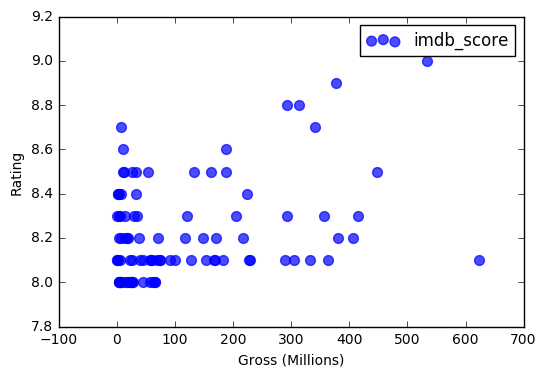

In [76]:
import matplotlib.pyplot as plt

#create scatter plot for x1 and x2
plt.scatter(x2, x1, marker='o', color='b', alpha=0.7,
           s=50)

plt.xlabel('Gross (Millions)')
plt.ylabel('Rating')
plt.legend(loc='best')

plt.show()

In [79]:
""" Q7:
Who is the director with the most movies?
"""

#value_counts() automatically sorts in desc order
#take the first record
df["director_name"].value_counts()[0:1]

Christopher Nolan    7
Name: director_name, dtype: int64

In [80]:
"""Q8:
List all of this director's movies and their ratings.
"""

nolan = df["director_name"] == "Christopher Nolan"
df[nolan][["movie_title","imdb_score"]]

,movie_title,imdb_score
5,The Dark Knight,9.0
6,Inception,8.8
7,Interstellar,8.6
8,Memento,8.5
9,The Prestige,8.5
10,The Dark Knight Rises,8.5
11,Batman Begins,8.3


In [81]:
"""Q9:
What is this director's average rating? 
"""

df[nolan]["imdb_score"].mean()

8.6

In [104]:
"""Q10: 
Create a GroupBy object that contains each director's name and his or her average rating.
Use your new object to find the average rating for Steven Spielberg.
"""

#groupby method, director_name is the key and avg imdb_score is value
directors = df.groupby("director_name")["imdb_score"].mean()
directors

director_name
Akira Kurosawa           8.700000
Alejandro Amenabar       8.100000
Alejandro G. Inarritu    8.100000
Alfred Hitchcock         8.500000
Andrew Stanton           8.300000
Anthony Russo            8.200000
Asghar Farhadi           8.400000
Billy Bob Thornton       8.000000
Billy Wilder             8.300000
Brad Bird                8.000000
Brian De Palma           8.300000
Bryan Singer             8.600000
Chan-wook Park           8.400000
Charles Chaplin          8.600000
Charles Ferguson         8.300000
Christopher Nolan        8.600000
Clint Eastwood           8.200000
Curtis Hanson            8.300000
Damien Chazelle          8.500000
Danny Boyle              8.200000
Darren Aronofsky         8.400000
David Fincher            8.500000
David Lean               8.300000
David Lynch              8.000000
Dean DeBlois             8.200000
Denis Villeneuve         8.150000
Edgar Wright             8.000000
Edward Zwick             8.000000
Elia Kazan               8.200000


In [89]:
type(directors)

pandas.core.series.Series

In [90]:
directors["Steven Spielberg"]

8.4800000000000004

In [91]:
"""Q11:
ARE YOU NOT ENTERTAINED? How long did the Gladiator aim to keep your attention?
"""

df[df["movie_title"] == "Gladiator"]["duration"]

51    171
Name: duration, dtype: int64

In [92]:
"""Q12:
Recommend a random movie that has a rating of over 8.3. 
What is the title and imdb_score of your first two recommendations?
"""

goodmovie = df["imdb_score"] > 8.3
df[goodmovie]["movie_title"].count()

60

In [93]:
import random

rand_int = random.randint(0,len(df[goodmovie])-1)
rand_goodmovie = df[goodmovie][rand_int:rand_int+1]
print("Here's one with ",rand_goodmovie["imdb_score"].iloc[0],"rating")
rand_goodmovie[["movie_title","imdb_score"]]

Here's one with  8.5 rating


,movie_title,imdb_score
1,The Green Mile,8.5


In [96]:
"""Q13:
Select the non-USA movies or movies made before 1960, by Hayao Miyazaki.
What are the years returned? 
"""

not_usa = df['country_id'] != 1
before_1960 = df['title_year'] < 1960
Miyazaki = df['director_id'] == 46

df[(not_usa|before_1960) & Miyazaki]

,movie_title,director_id,country_id,content_rating,title_year,imdb_score,gross,duration,id_x,country,id_y,director_name
134,Spirited Away,46,4,PG,2001,8.6,10049886,125,4,Japan,46,Hayao Miyazaki
135,Princess Mononoke,46,4,PG-13,1997,8.4,2298191,134,4,Japan,46,Hayao Miyazaki
136,Howl's Moving Castle,46,4,PG,2004,8.2,4710455,119,4,Japan,46,Hayao Miyazaki


In [97]:
df[(not_usa|before_1960) & Miyazaki]["title_year"]

134    2001
135    1997
136    2004
Name: title_year, dtype: int64

In [100]:
"""Q14: 
Create a Pivot Table that shows the median rating for each director, grouped into their respective countries.
"""

import numpy as np

pivot_agg = pd.pivot_table(df, index=['country','director_name'], values = ['imdb_score'], aggfunc=[np.median])
pivot_agg

median
                                              imdb_score
country      director_name                              
Argentina    Juan Jose Campanella                   8.20
Australia    George Miller                          8.10
Brazil       Fernando Meirelles                     8.70
             Jose Padilha                           8.10
Canada       Denis Villeneuve                       8.20
Denmark      Lars von Trier                         8.00
             Thomas Vinterberg                      8.20
France       David Lynch                            8.00
             Jean-Pierre Jeunet                     8.40
             Julian Schnabel                        8.00
             Michel Hazanavicius                    8.00
             Oliver Stone                           8.00
             Roman Polanski                         8.50
             Vincent Paronnaud                      8.00
Germany      Edward Zwick                           8.00
             Florian Henckel von Donnersmarck       8.50
             Fritz Lang                             8.30
             Michael Moore                          8.00
             Oliver Hirschbiegel                    8.30
India        Karan Johar                            8.00
             Rakeysh Omprakash Mehra                8.40
Iran         Asghar Farhadi                         8.40
Ireland      Lenny Abrahamson                       8.30
Italy        Sergio Leone                           8.40
Japan        Akira Kurosawa                         8.70
             Hayao Miyazaki                         8.40
             Katsuhiro Otomo                        8.10
Mexico       Alejandro G. Inarritu                  8.10
New Zealand  Peter Jackson                          8.80
South Korea  Chan-wook Park                         8.40
...                                                  ...
USA          Paul Greengrass                        8.10
             Paul Thomas Anderson                   8.05
             Pete Docter                            8.30
             Peter Jackson                          8.80
             Peter Weir                             8.10
             Quentin Tarantino                      8.35
             Richard Kelly                          8.10
             Richard Linklater                      8.00
             Richard Marquand                       8.40
             Ridley Scott                           8.20
             Rob Reiner                             8.10
             Robert Zemeckis                        8.65
             Roger Allers                           8.50
             Ron Howard                             8.10
             Sam Mendes                             8.40
             Sean Penn                              8.20
             Spike Jonze                            8.00
             Stephen Chbosky                        8.00
             Steve McQueen                          8.10
             Steven Spielberg                       8.50
             Tate Taylor                            8.10
             Tim Burton                             8.00
             Tim Miller                             8.10
             Tom McCarthy                           8.10
             Tony Kaye                              8.60
             Tony Scott                             8.00
             Victor Fleming                         8.15
             Wes Anderson                           8.10
             Woody Allen                            8.10
West Germany Wolfgang Petersen                      8.40

[125 rows x 1 columns]

In [109]:
"""Q15: 
Using numpy and pyplot, make an overlapping histogram that compares the imbd scores between R-Rated movies and PG-13 movies.
Describe your plot. 
"""

df_R = df[df["content_rating"]=='R']
df_PG13 = df[df["content_rating"]=='PG-13']

series_R = df_R["imdb_score"]
series_PG13 = df_PG13["imdb_score"]

series_PG13

5      9.0
6      8.8
7      8.6
9      8.5
10     8.5
11     8.3
12     8.9
13     8.7
14     8.8
24     8.3
25     8.1
30     8.8
53     8.1
64     8.3
67     8.1
78     8.2
81     8.2
86     8.2
87     8.0
98     8.1
100    8.1
102    8.1
103    8.0
104    8.1
105    8.1
116    8.1
124    8.0
127    8.0
128    8.0
135    8.4
152    8.1
155    8.1
162    8.0
163    8.0
164    8.0
165    8.4
168    8.0
175    8.1
Name: imdb_score, dtype: float64

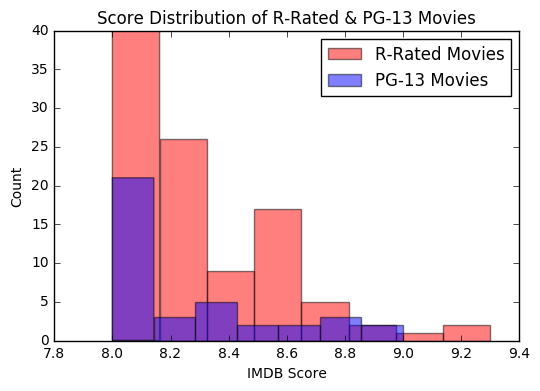

In [111]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(series_R, alpha=0.5, color='red', label='R-Rated Movies', bins='auto')
plt.hist(series_PG13, alpha=0.5, color='blue', label='PG-13 Movies', bins='auto')

plt.xlabel('IMDB Score')
plt.ylabel('Count')

plt.legend(loc='best')
plt.title("Score Distribution of R-Rated & PG-13 Movies")

plt.show() 